# Sierpinski Carpet

Background

The Sierpinski carpet is a plane fractal first introduced by Waclaw Sierpiński in 1916. It starts with a square that is divided into 9 equal subsquares in a 3x3 grid. The central subsquare is removed, and this process is repeated recursively with the remaining 8 subsquares, creating a plane fractal that can continue infinitely!

# Software

The maplotlib library is used to create the sierpinski carpet. As the depth of the sierpinski curtain increase the code executes at a slower pace as more calculations are done.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

The inital value of the dimensions, limit and depth are set.

Adjust the value of <b>depth</b> to increase or decrease the complexity of the sierpinski carpet

In [2]:
# Initialize global variables
dim = 513
limit = dim
depth = 4

This function calculates the the values for x and y to calculate the size and location of each square 

In [3]:
# Create the Sierpinski Carpet function
def sierpinskiCarpet(x, y, size):
    global limit  # Reference the global variable
    
    if size < limit:  # Base case to exit recursion
        return
    
    size /= 3 
    
    # Loop to create the carpet pattern
    for i in range(9):
        if i == 4:  # Draw the central black square
            x_center = x + size
            y_center = y - size  # Matplotlib uses negative y for downward direction

            # Create a filled square
            plt.gca().add_patch(
                Rectangle(
                    (x_center, y_center),  # Bottom-left corner
                    size,  
                    -size,  
                    facecolor='black'  
                )
            )
        else:
            # Calculate new x and y positions for recursion
            x_new = x + (i % 3) * size
            y_new = y - (i // 3) * size

            # Recursive call with updated coordinates
            sierpinskiCarpet(x_new, y_new, size)

This function sets up the figure and calls on the function to plot the Sierpinski carpet with the specified depth

In [4]:

def draw_carpet():
    global limit  

    plt.figure(figsize=(6, 6), facecolor='white') 

    for _ in range(depth):
        sierpinskiCarpet(0, dim, dim)
        limit /= 3 
    
    plt.axis('equal')
    plt.axis('off')  
    plt.show()  

this line calls the function to draw the Sierpenski carpet

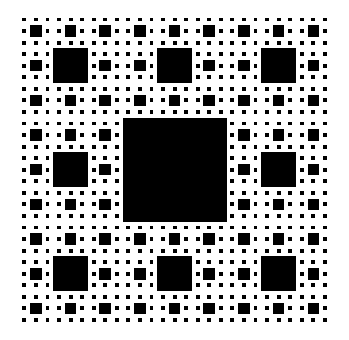

In [5]:
draw_carpet()

The final Sierpenski carpet is plotted above. This shows an example of what the hardware element should display.

# Hardware 

An attempt has been made at implementing some hardware elements along with the software elements. The hardware and software need adjusting to compensate for the decimal numbers inputting and outputting from the hardware.   

<b>Sierpinski IP core</b>

The IP core calculates the values for x and y for both plotting and the next iteration of the sierpenski carpet function.

![image.png](vivado.png)

![image.png](hardware.png)

In [6]:
from pynq import Overlay
ol = Overlay("SCfinal_wrapper.bit")
import matplotlib.pyplot as plt
import numpy
from ipywidgets import *

The line below simplifies the IP cores with a alias as this make is easier to call later in ou

In [7]:
sc = ol.scfinal_0

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [9]:
# Initialize global variables
dim = 513
limit = dim
depth = 4

below is the overall hardware. In future versions the inputs should be divided by a factor of 100 and the outputs will be multiplied by a factor of 100. This is to compensate for the hardwares limitation. As decimal numbers cannot be input or output from the hardware it cannot communicate the true values to the python code. This has lead to problems with plotting the sierpinski carpet but with further development this issue should be dissolved.

![image.png](system.png)

Below is a similar function to the software but the calculations to find x and y have been moved to the hardware element of the design. As stated before in future versions the hardware will be adjusted, and this is also true for the following function. As the inputs size, y, and x will be multiplied by a factor of 100 to account for the decimal numbers. The outputs x_new and y_new will also need to be adjusted as they will output multipled by a factor of 100 they would need to be divided by a factor of 100 to properly create the Sierpinski carpet. 

In [10]:
# Create the Sierpinski Carpet function
def sierpinskiCarpet(x, y, size):
    global limit  
    
    if size < limit: 
        return
    
    size = size /3  
  
    size_input = int(size)
    
    # Loop to create the carpet pattern
    for i in range(9):
        
        sc.write(0x00,y)
        sc.write(0x08,x)
        sc.write(0x04,size_input)
        sc.write(0x0C,i)
        
        x_new = sc.read(0x10)
        y_new = sc.read(0x14)
        
        if i == 4:  # Draw the central black square
           
            # Create a filled square
            plt.gca().add_patch(
                Rectangle(
                    (x_new, y_new),  
                    size,  
                    -size,  
                    facecolor='black'  
                )
            )
        else:
         
            # Recursive call with updated coordinates
            sierpinskiCarpet(x_new, y_new, size)

In [11]:
# Function to set up and draw the Sierpinski Carpet
def draw_carpet():
    global limit  

    plt.figure(figsize=(6, 6), facecolor='white')  

    # Draw the Sierpinski Carpet with the specified depth
    for _ in range(depth):
        sierpinskiCarpet(0, dim, dim)
        limit /= 3  
    
    plt.axis('equal')  
    plt.axis('off')  
    plt.show()  

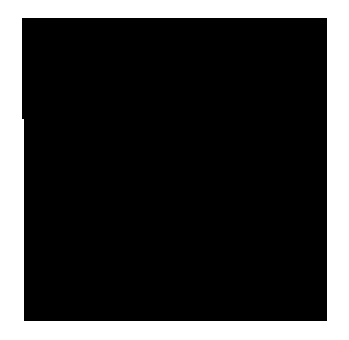

In [12]:
draw_carpet()

As seen above the sierpenski carpet has not been plotted correctly due to the issues described above 